# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
original_data_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
original_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Checking the number of mice.
number_of_mice = original_data_df["Mouse ID"].nunique()
number_of_mice

249

In [5]:
original_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Owen Wang helped me with the command: .duplicated
# This was my original code:
# duplicate_mice_screen = original_data_df.duplicated(subset=["Mouse ID", "Timepoint"],keep="first")
# duplicate_mouse = duplicate_mice_screen.loc[duplicate_mice_screen==True]
# duplicate_mouse.to_frame()
# I couldn't solve it, but AskBCS gave me this, which builds off of my own:
duplicate_mouse_ids = original_data_df.loc[original_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# I tried to provide this line of code, which didn't work, and AskBCS provided the line below it.
# de_duplicated = original_data_df.delete([(original_data_df["Mouse ID"] == duplicate_mouse_ids), :])

de_duplicated = original_data_df[original_data_df['Mouse ID'].isin(duplicate_mouse_ids)==False]


In [9]:
# Checking the number of mice in the clean DataFrame.
de_dup_mouse_count = de_duplicated["Mouse ID"].nunique()
de_dup_mouse_count

#this is supposed to be 248

248

In [10]:
type(de_dup_mouse_count)

int

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_stats = de_duplicated.groupby(["Drug Regimen"])

mouse_mean = pd.DataFrame(mouse_stats["Tumor Volume (mm3)"].mean()).squeeze()
mouse_median = pd.DataFrame(mouse_stats["Tumor Volume (mm3)"].median()).squeeze()
mouse_variance = pd.DataFrame(mouse_stats["Tumor Volume (mm3)"].var()).squeeze()
mouse_stdev = pd.DataFrame(mouse_stats["Tumor Volume (mm3)"].std()).squeeze()
mouse_sem = pd.DataFrame(mouse_stats["Tumor Volume (mm3)"].sem()).squeeze()

full_mouse_stats = pd.DataFrame({"Mean Tumor Volume": mouse_mean,
    "Median Tumor Volume": mouse_median,
    "Tumor Volume Variance": mouse_variance,
    "Tumor Volume Std. Dev.": mouse_stdev,
    "Tumor Volume Std. Err.": mouse_sem})
full_mouse_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
de_duplicated.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std"])
#This code came from the tutor

,mean,median,var,std
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar and Pie Charts

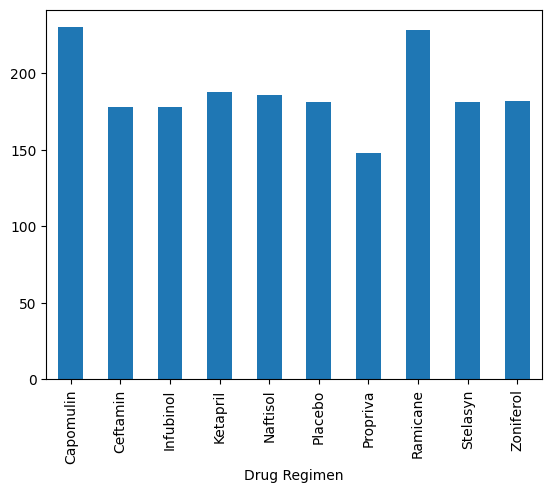

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_groups = de_duplicated.groupby("Drug Regimen")
mice_datapoints = drug_regimen_groups["Drug Regimen"].count()
num_row_bar = mice_datapoints.plot(kind="bar")

#does this count as being by pandas?

In [14]:
de_duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
# plt.plot(list(de_duplicated["Tumor Volume (mm3)"]))

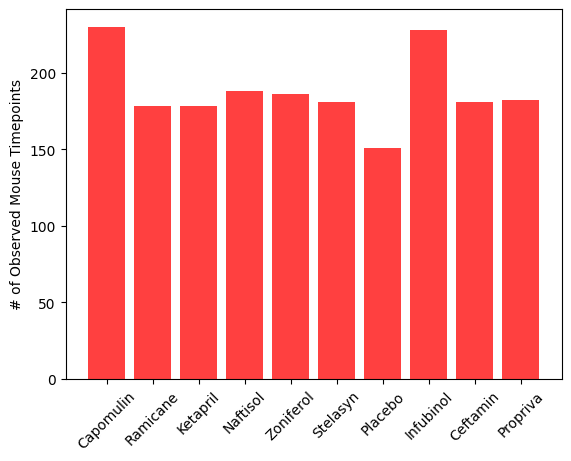

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimens = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]
regimen_counts = [230, 178, 178, 188, 186, 181, 151, 228, 181, 182]
x_axis = np.arange(0, len(regimens))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.bar(regimens, regimen_counts, facecolor="red", alpha=0.75, align="center")
plt.ylabel("# of Observed Mouse Timepoints")
# plt.xlabel(regimens)
plt.xticks(rotation=45)
plt.show();

#The tutor helped me get the labels to orient correctly
#need to rotate the labels at the bottom
# is this a pyplot?

<function matplotlib.pyplot.show(close=None, block=None)>

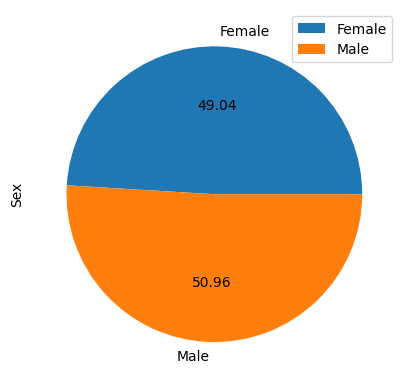

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = de_duplicated.groupby(["Sex"])
mouse_gender_count = pd.DataFrame(mouse_gender["Sex"].count())
mouse_gender_count
gender_split = mouse_gender_count.plot(kind="pie",y="Sex",autopct="%.2f")
plt.show
#get rid of the metadata at the top

In [17]:
mouse_gender_count

,Sex
Sex,
Female,922
Male,958


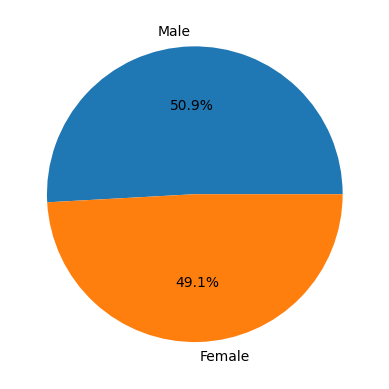

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_type = ["Male", "Female"]
gender_count = [958, 925]

plt.pie(gender_count, labels=gender_type, autopct="%0.1f%%")
plt.show()
#amounts do not add up

## Quartiles, Outliers and Boxplots

In [19]:
de_duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
#Make sure each mouse only had one drug regimen--can use a groupby mouseID function
mouse_drug_groupings = de_duplicated.groupby("Mouse ID").nunique()
mouse_drug_groupings

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,1,1,1,1,10,10,3
a251,1,1,1,1,10,10,2
a262,1,1,1,1,10,10,5
a275,1,1,1,1,10,10,4
a366,1,1,1,1,7,7,2
...,...,...,...,...,...,...,...
z435,1,1,1,1,3,3,1
z578,1,1,1,1,10,10,1
z581,1,1,1,1,10,10,4


In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by filtering de_duplicated table for rows where Drug Regimen is Capomulin, Ramicane, Infubiol, and Ceftamin
four_regimens_df = de_duplicated.loc[(de_duplicated["Drug Regimen"] == "Capomulin") | (de_duplicated["Drug Regimen"] == "Ramicane") | (de_duplicated["Drug Regimen"] == "Infubinol") | (de_duplicated["Drug Regimen"] == "Ceftamin"), :]

# # Start by getting the last (greatest) timepoint for each mouse
group_by_mouse_id = de_duplicated.groupby("Mouse ID")
last_timepoint = pd.DataFrame(group_by_mouse_id["Timepoint"].max())

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mousey_mergey = pd.merge(last_timepoint, four_regimens_df, on=["Mouse ID", "Timepoint"], how="inner")
mousey_mergey
# last_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [41]:
mousey_mergey[mousey_mergey["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"].max(), mousey_mergey[mousey_mergey["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"].min()
#The tutor wrote this

(72.2267309, 36.3213458)

In [42]:
# Put treatments into a list for for loop (and later for plot labels)
#provided by AskBCS:
four_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in four_regimens:
    final_tumor_volume = mousey_mergey.loc[mousey_mergey["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(
        final_tumor_volume
    )
    
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr_1_5 = iqr * 1.5
    lower_bound = lowerq - (iqr_1_5)
    upper_bound = upperq + (iqr_1_5)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print (f"{treatment}: {outliers}")


    # Locate the rows which contain mice on each drug and get the tumor volumes
    #this part provided by askBCS
    # final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # add subset 

    
    # Determine outliers using upper and lower bounds

# I came to the tutor with this problem half-done and asked for help and he pretty much finished it for me while walking me through it

Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


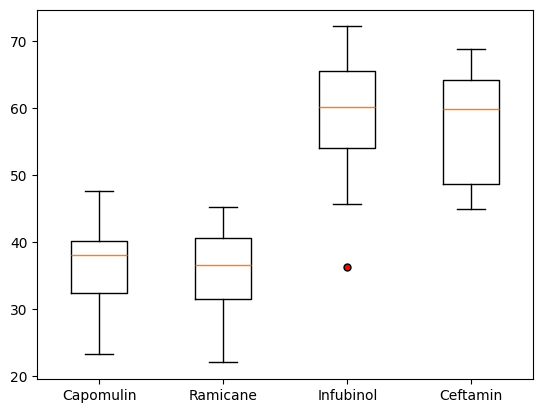

In [43]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier_plot = dict(markerfacecolor = "red", markersize = 5)
plt.boxplot(tumor_vol_data, labels=four_regimens, flierprops=outlier_plot)
plt.plot();

# I asked the tutor for guidance on this and he did it for me while walking me through it

## Line and Scatter Plots

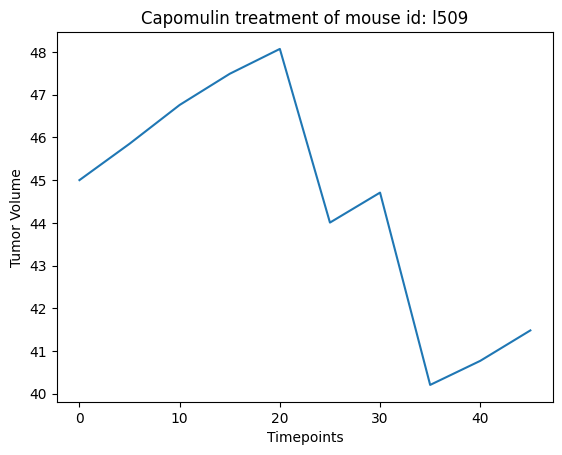

In [52]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice=de_duplicated.loc[de_duplicated["Drug Regimen"] == "Capomulin"]
mouse_data = capomulin_mice.loc[capomulin_mice["Mouse ID"] == "l509"]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume")
plt.xlabel("Timepoints")
plt.title("Capomulin treatment of mouse id: l509")           
plt.show();

#The TA dictated this code to me while explaining it to me

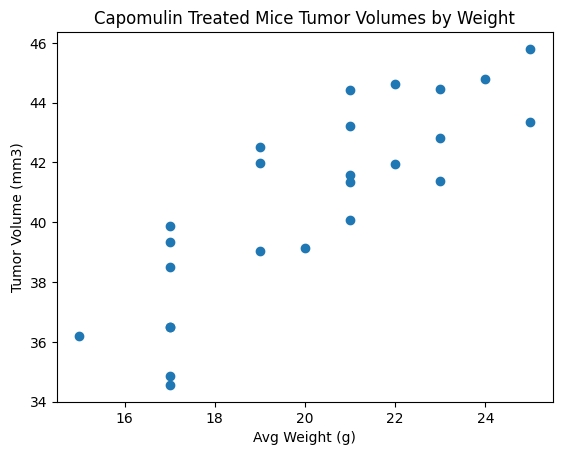

In [70]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mice_vol_weight=de_duplicated.loc[de_duplicated["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_mice_vol_weight.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
capomulin_average
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Avg Weight (g)")
plt.title("Capomulin Treated Mice Tumor Volumes by Weight")           
plt.show();
#The TA helped me with this problem--I started it but he walked me through the completion

## Correlation and Regression

In [80]:
# y = theta + x(intercept) + epsilon

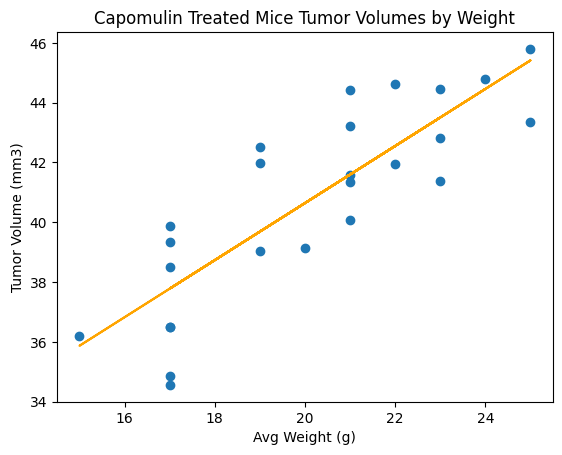

In [83]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
pearsonr = round(st.pearsonr(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])[0],2)
# st.pearsonr(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])[0]
model =st.linregress(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
y_values = capomulin_average["Weight (g)"]* model[0] + model[1]
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.plot(capomulin_average["Weight (g)"], y_values, color = "orange")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Avg Weight (g)")
plt.title("Capomulin Treated Mice Tumor Volumes by Weight")           
plt.show();

#The TA typed most of this code himself